In [ ]:
import pandas as pd
import numpy as np
from transformers import pipeline

In [4]:
books = pd.read_csv("../datasets/books_data.csv")

In [5]:
books.head()

,BookID,FormattedBookID,Book,Author,Description,Genres,Avg_Rating,Num_Ratings,URL,id_desc
0,1,BK000001,Harry Potter and the Philosopher’s Stone (Harr...,J.K. Rowling,Harry Potter thinks he is an ordinary boy - un...,"['Fantasy', 'Fiction', 'Young Adult', 'Magic',...",4.47,9278135,https://www.goodreads.com/book/show/72193.Harr...,BK000001 Harry Potter thinks he is an ordinary...
1,2,BK000002,"Hungerspelen (The Hunger Games, #1)",Suzanne Collins,24 deltagare. Bara en överlever. Varje år dire...,"['Young Adult', 'Fiction', 'Dystopia', 'Fantas...",4.33,7963186,https://www.goodreads.com/book/show/13616052-h...,BK000002 24 deltagare. Bara en överlever. Varj...
2,3,BK000003,"The Hunger Games (The Hunger Games, #1)",Suzanne Collins,"Could you survive on your own in the wild, wit...","['Young Adult', 'Fiction', 'Dystopia', 'Fantas...",4.33,7963186,https://www.goodreads.com/book/show/12187803-t...,BK000003 Could you survive on your own in the ...
3,4,BK000004,"The Hunger Games (The Hunger Games, #1)",Suzanne Collins,In the ruins of a place once known as North Am...,"['Young Adult', 'Fiction', 'Dystopia', 'Fantas...",4.33,7963186,https://www.goodreads.com/book/show/18626858-t...,BK000004 In the ruins of a place once known as...
4,5,BK000005,"The Hunger Games (The Hunger Games, #1)",Suzanne Collins,Sometime in the future after the destruction o...,"['Young Adult', 'Fiction', 'Dystopia', 'Fantas...",4.33,7963186,https://www.goodreads.com/book/show/12091570-t...,BK000005 Sometime in the future after the dest...


In [43]:
books.isna().sum()

BookID             0
FormattedBookID    0
Book               0
Author             0
Description        0
Genres             0
Avg_Rating         0
Num_Ratings        0
URL                0
dtype: int64

In [44]:
len(books["Genres"].unique())

8038

In [45]:
def process_genres(df):
    df['Processed_Genres'] = df['Genres'].apply(
        lambda x: [genre.strip() for genre in eval(x) if genre.strip()]
    )
    
    unique_genres = set(genre for sublist in df['Processed_Genres'] for genre in sublist)
    
    return unique_genres  
top_n_genres = process_genres(books)
len(top_n_genres)
books

,BookID,FormattedBookID,Book,Author,Description,Genres,Avg_Rating,Num_Ratings,URL,Processed_Genres
0,1,BK000001,Harry Potter and the Philosopher’s Stone (Harr...,J.K. Rowling,Harry Potter thinks he is an ordinary boy - un...,"['Fantasy', 'Fiction', 'Young Adult', 'Magic',...",4.47,9278135,https://www.goodreads.com/book/show/72193.Harr...,"[Fantasy, Fiction, Young Adult, Magic, Childre..."
1,2,BK000002,"Hungerspelen (The Hunger Games, #1)",Suzanne Collins,24 deltagare. Bara en överlever. Varje år dire...,"['Young Adult', 'Fiction', 'Dystopia', 'Fantas...",4.33,7963186,https://www.goodreads.com/book/show/13616052-h...,"[Young Adult, Fiction, Dystopia, Fantasy, Scie..."
2,3,BK000003,"The Hunger Games (The Hunger Games, #1)",Suzanne Collins,"Could you survive on your own in the wild, wit...","['Young Adult', 'Fiction', 'Dystopia', 'Fantas...",4.33,7963186,https://www.goodreads.com/book/show/12187803-t...,"[Young Adult, Fiction, Dystopia, Fantasy, Scie..."
3,4,BK000004,"The Hunger Games (The Hunger Games, #1)",Suzanne Collins,In the ruins of a place once known as North Am...,"['Young Adult', 'Fiction', 'Dystopia', 'Fantas...",4.33,7963186,https://www.goodreads.com/book/show/18626858-t...,"[Young Adult, Fiction, Dystopia, Fantasy, Scie..."
4,5,BK000005,"The Hunger Games (The Hunger Games, #1)",Suzanne Collins,Sometime in the future after the destruction o...,"['Young Adult', 'Fiction', 'Dystopia', 'Fantas...",4.33,7963186,https://www.goodreads.com/book/show/12091570-t...,"[Young Adult, Fiction, Dystopia, Fantasy, Scie..."
...,...,...,...,...,...,...,...,...,...,...
9030,9031,BK009031,The Alchemy Of The Soul,Vikram Joshi,I feel that I was partly responsible for my fa...,['Spirituality'],4.25,4,https://www.goodreads.com/book/show/13629106-t...,[Spirituality]
9031,9032,BK009032,A Hummen in Spiral Gorge (Stones of Elemdray #1),T. William Watts,"“No common dreams, no common pools,For these t...","['Childrens', 'Middle Grade', 'Young Readers']",5.00,4,https://www.goodreads.com/book/show/17189921-a...,"[Childrens, Middle Grade, Young Readers]"
9032,9033,BK009033,The Travels of Marco Polo,Giulio Einaudi,"Marco Polo, a Medieval Venetian, traveled thro...","['Travel', 'History']",3.00,4,https://www.goodreads.com/book/show/15790154-t...,"[Travel, History]"
9033,9034,BK009034,Parenting Your Child Leader: Strategies for He...,Darryl Bodkin,p>Darryl Bodkin has written a wonderful treati...,['Parenting'],4.50,4,https://www.goodreads.com/book/show/17989576-p...,[Parenting]


In [46]:
from collections import Counter

genre_counts = Counter(genre for sublist in books['Processed_Genres'] for genre in sublist)

# Get the top 50 genres
top_50_genres = [genre for genre, count in genre_counts.most_common(50)]
print(top_50_genres) 

['Fiction', 'Nonfiction', 'Fantasy', 'Classics', 'Romance', 'Young Adult', 'Historical Fiction', 'Mystery', 'Contemporary', 'Audiobook', 'Novels', 'Literature', 'Thriller', 'Historical', 'Science Fiction', 'History', 'Adventure', 'Philosophy', 'Biography', 'Self Help', 'Crime', 'Psychology', 'Adult', 'Mystery Thriller', 'Childrens', 'Memoir', 'Humor', 'Suspense', 'Horror', 'Paranormal', 'Science Fiction Fantasy', 'Personal Development', 'Religion', 'Middle Grade', 'Drama', 'Literary Fiction', 'Business', 'Politics', 'Short Stories', 'Science', 'Spirituality', 'War', 'Magic', 'Dystopia', 'Poetry', 'American', 'Christian', 'British Literature', 'School', 'Adult Fiction']


In [47]:
books

,BookID,FormattedBookID,Book,Author,Description,Genres,Avg_Rating,Num_Ratings,URL,Processed_Genres
0,1,BK000001,Harry Potter and the Philosopher’s Stone (Harr...,J.K. Rowling,Harry Potter thinks he is an ordinary boy - un...,"['Fantasy', 'Fiction', 'Young Adult', 'Magic',...",4.47,9278135,https://www.goodreads.com/book/show/72193.Harr...,"[Fantasy, Fiction, Young Adult, Magic, Childre..."
1,2,BK000002,"Hungerspelen (The Hunger Games, #1)",Suzanne Collins,24 deltagare. Bara en överlever. Varje år dire...,"['Young Adult', 'Fiction', 'Dystopia', 'Fantas...",4.33,7963186,https://www.goodreads.com/book/show/13616052-h...,"[Young Adult, Fiction, Dystopia, Fantasy, Scie..."
2,3,BK000003,"The Hunger Games (The Hunger Games, #1)",Suzanne Collins,"Could you survive on your own in the wild, wit...","['Young Adult', 'Fiction', 'Dystopia', 'Fantas...",4.33,7963186,https://www.goodreads.com/book/show/12187803-t...,"[Young Adult, Fiction, Dystopia, Fantasy, Scie..."
3,4,BK000004,"The Hunger Games (The Hunger Games, #1)",Suzanne Collins,In the ruins of a place once known as North Am...,"['Young Adult', 'Fiction', 'Dystopia', 'Fantas...",4.33,7963186,https://www.goodreads.com/book/show/18626858-t...,"[Young Adult, Fiction, Dystopia, Fantasy, Scie..."
4,5,BK000005,"The Hunger Games (The Hunger Games, #1)",Suzanne Collins,Sometime in the future after the destruction o...,"['Young Adult', 'Fiction', 'Dystopia', 'Fantas...",4.33,7963186,https://www.goodreads.com/book/show/12091570-t...,"[Young Adult, Fiction, Dystopia, Fantasy, Scie..."
...,...,...,...,...,...,...,...,...,...,...
9030,9031,BK009031,The Alchemy Of The Soul,Vikram Joshi,I feel that I was partly responsible for my fa...,['Spirituality'],4.25,4,https://www.goodreads.com/book/show/13629106-t...,[Spirituality]
9031,9032,BK009032,A Hummen in Spiral Gorge (Stones of Elemdray #1),T. William Watts,"“No common dreams, no common pools,For these t...","['Childrens', 'Middle Grade', 'Young Readers']",5.00,4,https://www.goodreads.com/book/show/17189921-a...,"[Childrens, Middle Grade, Young Readers]"
9032,9033,BK009033,The Travels of Marco Polo,Giulio Einaudi,"Marco Polo, a Medieval Venetian, traveled thro...","['Travel', 'History']",3.00,4,https://www.goodreads.com/book/show/15790154-t...,"[Travel, History]"
9033,9034,BK009034,Parenting Your Child Leader: Strategies for He...,Darryl Bodkin,p>Darryl Bodkin has written a wonderful treati...,['Parenting'],4.50,4,https://www.goodreads.com/book/show/17989576-p...,[Parenting]


In [48]:
def filter_top_genres(genres, top_genres):
    return [genre for genre in genres if genre in top_genres]

In [49]:
books['Filtered_Genres'] = books['Processed_Genres'].apply(lambda x: filter_top_genres(x, top_50_genres))

# Remove books with no matching top genres
books_remain = books[books['Filtered_Genres'].str.len() > 0]

print(f"Remaining books: {len(books)}")

Remaining books: 9035


In [50]:
books_remain

,BookID,FormattedBookID,Book,Author,Description,Genres,Avg_Rating,Num_Ratings,URL,Processed_Genres,Filtered_Genres
0,1,BK000001,Harry Potter and the Philosopher’s Stone (Harr...,J.K. Rowling,Harry Potter thinks he is an ordinary boy - un...,"['Fantasy', 'Fiction', 'Young Adult', 'Magic',...",4.47,9278135,https://www.goodreads.com/book/show/72193.Harr...,"[Fantasy, Fiction, Young Adult, Magic, Childre...","[Fantasy, Fiction, Young Adult, Magic, Childre..."
1,2,BK000002,"Hungerspelen (The Hunger Games, #1)",Suzanne Collins,24 deltagare. Bara en överlever. Varje år dire...,"['Young Adult', 'Fiction', 'Dystopia', 'Fantas...",4.33,7963186,https://www.goodreads.com/book/show/13616052-h...,"[Young Adult, Fiction, Dystopia, Fantasy, Scie...","[Young Adult, Fiction, Dystopia, Fantasy, Scie..."
2,3,BK000003,"The Hunger Games (The Hunger Games, #1)",Suzanne Collins,"Could you survive on your own in the wild, wit...","['Young Adult', 'Fiction', 'Dystopia', 'Fantas...",4.33,7963186,https://www.goodreads.com/book/show/12187803-t...,"[Young Adult, Fiction, Dystopia, Fantasy, Scie...","[Young Adult, Fiction, Dystopia, Fantasy, Scie..."
3,4,BK000004,"The Hunger Games (The Hunger Games, #1)",Suzanne Collins,In the ruins of a place once known as North Am...,"['Young Adult', 'Fiction', 'Dystopia', 'Fantas...",4.33,7963186,https://www.goodreads.com/book/show/18626858-t...,"[Young Adult, Fiction, Dystopia, Fantasy, Scie...","[Young Adult, Fiction, Dystopia, Fantasy, Scie..."
4,5,BK000005,"The Hunger Games (The Hunger Games, #1)",Suzanne Collins,Sometime in the future after the destruction o...,"['Young Adult', 'Fiction', 'Dystopia', 'Fantas...",4.33,7963186,https://www.goodreads.com/book/show/12091570-t...,"[Young Adult, Fiction, Dystopia, Fantasy, Scie...","[Young Adult, Fiction, Dystopia, Fantasy, Scie..."
...,...,...,...,...,...,...,...,...,...,...,...
9029,9030,BK009030,"The Stone Seekers (Dragon Hunters, #1)",L.L. Hansen,"In 1000 B.C., two 10-year-old boys, Zeth and C...","['Fantasy', 'Dragons']",4.00,4,https://www.goodreads.com/book/show/17259389-t...,"[Fantasy, Dragons]",[Fantasy]
9030,9031,BK009031,The Alchemy Of The Soul,Vikram Joshi,I feel that I was partly responsible for my fa...,['Spirituality'],4.25,4,https://www.goodreads.com/book/show/13629106-t...,[Spirituality],[Spirituality]
9031,9032,BK009032,A Hummen in Spiral Gorge (Stones of Elemdray #1),T. William Watts,"“No common dreams, no common pools,For these t...","['Childrens', 'Middle Grade', 'Young Readers']",5.00,4,https://www.goodreads.com/book/show/17189921-a...,"[Childrens, Middle Grade, Young Readers]","[Childrens, Middle Grade]"
9032,9033,BK009033,The Travels of Marco Polo,Giulio Einaudi,"Marco Polo, a Medieval Venetian, traveled thro...","['Travel', 'History']",3.00,4,https://www.goodreads.com/book/show/15790154-t...,"[Travel, History]",[History]


In [51]:
genre_mapping = {
    "Fiction": ["Fiction", "Historical Fiction", "Adult Fiction"],
    
    "Nonfiction": ["Nonfiction", "Self Help", "Psychology", "Business", "Politics", "Science", "History", 
                   "Philosophy", "Personal Development", "Memoir", "Biography","Thriller", "Mystery", "Mystery Thriller", "Crime", "Suspense",
                   "Fantasy", "Magic", "Paranormal", "Science Fiction", "Science Fiction Fantasy", "Adventure", "Dystopia",
                   "Romance", "Chick Lit", "Romantic Suspense","Horror", "Young Adult"],
}

In [52]:
def map_genre(genre_list):
    for main_genre, sub_genres in genre_mapping.items():
        if any(genre in sub_genres for genre in genre_list):
            return main_genre 
    return "Other"  

# Apply mapping to the dataset
books_remain.loc[:, "Mapped_Genre"] = books_remain["Filtered_Genres"].apply(map_genre)

# Count the occurrences of mapped genres
mapped_counts = books_remain["Mapped_Genre"].value_counts()

# Display the genre counts
print(mapped_counts)


Mapped_Genre
Fiction       5748
Nonfiction    3097
Other          108
Name: count, dtype: int64


C:\Users\ANAND REDDY\AppData\Local\Temp\ipykernel_5648\2978702509.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_remain.loc[:, "Mapped_Genre"] = books_remain["Filtered_Genres"].apply(map_genre)


In [53]:
print(books_remain[books_remain["Mapped_Genre"] == "Other"]["Filtered_Genres"].value_counts())


Filtered_Genres
[Poetry]                               22
[Religion]                             11
[Christian]                            10
[Childrens]                            10
[Contemporary]                          7
[Drama]                                 6
[Spirituality]                          6
[Short Stories]                         5
[Drama, Contemporary]                   2
[Christian, Religion, Spirituality]     2
[Humor]                                 2
[Middle Grade]                          2
[Novels, Contemporary, Drama]           1
[Contemporary, Humor]                   1
[Contemporary, Novels]                  1
[Literary Fiction]                      1
[Novels, Drama, Contemporary]           1
[Novels, Short Stories]                 1
[Contemporary, Novels, Drama]           1
[Humor, Short Stories]                  1
[Drama, Novels, Contemporary]           1
[Contemporary, Adult]                   1
[Adult]                                 1
[Christian, Contem

In [54]:
print(mapped_counts)
books_remain["Processed_Genres"].value_counts()
books_remain

Mapped_Genre
Fiction       5748
Nonfiction    3097
Other          108
Name: count, dtype: int64


,BookID,FormattedBookID,Book,Author,Description,Genres,Avg_Rating,Num_Ratings,URL,Processed_Genres,Filtered_Genres,Mapped_Genre
0,1,BK000001,Harry Potter and the Philosopher’s Stone (Harr...,J.K. Rowling,Harry Potter thinks he is an ordinary boy - un...,"['Fantasy', 'Fiction', 'Young Adult', 'Magic',...",4.47,9278135,https://www.goodreads.com/book/show/72193.Harr...,"[Fantasy, Fiction, Young Adult, Magic, Childre...","[Fantasy, Fiction, Young Adult, Magic, Childre...",Fiction
1,2,BK000002,"Hungerspelen (The Hunger Games, #1)",Suzanne Collins,24 deltagare. Bara en överlever. Varje år dire...,"['Young Adult', 'Fiction', 'Dystopia', 'Fantas...",4.33,7963186,https://www.goodreads.com/book/show/13616052-h...,"[Young Adult, Fiction, Dystopia, Fantasy, Scie...","[Young Adult, Fiction, Dystopia, Fantasy, Scie...",Fiction
2,3,BK000003,"The Hunger Games (The Hunger Games, #1)",Suzanne Collins,"Could you survive on your own in the wild, wit...","['Young Adult', 'Fiction', 'Dystopia', 'Fantas...",4.33,7963186,https://www.goodreads.com/book/show/12187803-t...,"[Young Adult, Fiction, Dystopia, Fantasy, Scie...","[Young Adult, Fiction, Dystopia, Fantasy, Scie...",Fiction
3,4,BK000004,"The Hunger Games (The Hunger Games, #1)",Suzanne Collins,In the ruins of a place once known as North Am...,"['Young Adult', 'Fiction', 'Dystopia', 'Fantas...",4.33,7963186,https://www.goodreads.com/book/show/18626858-t...,"[Young Adult, Fiction, Dystopia, Fantasy, Scie...","[Young Adult, Fiction, Dystopia, Fantasy, Scie...",Fiction
4,5,BK000005,"The Hunger Games (The Hunger Games, #1)",Suzanne Collins,Sometime in the future after the destruction o...,"['Young Adult', 'Fiction', 'Dystopia', 'Fantas...",4.33,7963186,https://www.goodreads.com/book/show/12091570-t...,"[Young Adult, Fiction, Dystopia, Fantasy, Scie...","[Young Adult, Fiction, Dystopia, Fantasy, Scie...",Fiction
...,...,...,...,...,...,...,...,...,...,...,...,...
9029,9030,BK009030,"The Stone Seekers (Dragon Hunters, #1)",L.L. Hansen,"In 1000 B.C., two 10-year-old boys, Zeth and C...","['Fantasy', 'Dragons']",4.00,4,https://www.goodreads.com/book/show/17259389-t...,"[Fantasy, Dragons]",[Fantasy],Nonfiction
9030,9031,BK009031,The Alchemy Of The Soul,Vikram Joshi,I feel that I was partly responsible for my fa...,['Spirituality'],4.25,4,https://www.goodreads.com/book/show/13629106-t...,[Spirituality],[Spirituality],Other
9031,9032,BK009032,A Hummen in Spiral Gorge (Stones of Elemdray #1),T. William Watts,"“No common dreams, no common pools,For these t...","['Childrens', 'Middle Grade', 'Young Readers']",5.00,4,https://www.goodreads.com/book/show/17189921-a...,"[Childrens, Middle Grade, Young Readers]","[Childrens, Middle Grade]",Other
9032,9033,BK009033,The Travels of Marco Polo,Giulio Einaudi,"Marco Polo, a Medieval Venetian, traveled thro...","['Travel', 'History']",3.00,4,https://www.goodreads.com/book/show/15790154-t...,"[Travel, History]",[History],Nonfiction


In [55]:
books_remain = books_remain[books_remain['Mapped_Genre'] != 'Other']

In [56]:
books_remain.reset_index(drop=True, inplace=True)


In [57]:
books_remain

,BookID,FormattedBookID,Book,Author,Description,Genres,Avg_Rating,Num_Ratings,URL,Processed_Genres,Filtered_Genres,Mapped_Genre
0,1,BK000001,Harry Potter and the Philosopher’s Stone (Harr...,J.K. Rowling,Harry Potter thinks he is an ordinary boy - un...,"['Fantasy', 'Fiction', 'Young Adult', 'Magic',...",4.47,9278135,https://www.goodreads.com/book/show/72193.Harr...,"[Fantasy, Fiction, Young Adult, Magic, Childre...","[Fantasy, Fiction, Young Adult, Magic, Childre...",Fiction
1,2,BK000002,"Hungerspelen (The Hunger Games, #1)",Suzanne Collins,24 deltagare. Bara en överlever. Varje år dire...,"['Young Adult', 'Fiction', 'Dystopia', 'Fantas...",4.33,7963186,https://www.goodreads.com/book/show/13616052-h...,"[Young Adult, Fiction, Dystopia, Fantasy, Scie...","[Young Adult, Fiction, Dystopia, Fantasy, Scie...",Fiction
2,3,BK000003,"The Hunger Games (The Hunger Games, #1)",Suzanne Collins,"Could you survive on your own in the wild, wit...","['Young Adult', 'Fiction', 'Dystopia', 'Fantas...",4.33,7963186,https://www.goodreads.com/book/show/12187803-t...,"[Young Adult, Fiction, Dystopia, Fantasy, Scie...","[Young Adult, Fiction, Dystopia, Fantasy, Scie...",Fiction
3,4,BK000004,"The Hunger Games (The Hunger Games, #1)",Suzanne Collins,In the ruins of a place once known as North Am...,"['Young Adult', 'Fiction', 'Dystopia', 'Fantas...",4.33,7963186,https://www.goodreads.com/book/show/18626858-t...,"[Young Adult, Fiction, Dystopia, Fantasy, Scie...","[Young Adult, Fiction, Dystopia, Fantasy, Scie...",Fiction
4,5,BK000005,"The Hunger Games (The Hunger Games, #1)",Suzanne Collins,Sometime in the future after the destruction o...,"['Young Adult', 'Fiction', 'Dystopia', 'Fantas...",4.33,7963186,https://www.goodreads.com/book/show/12091570-t...,"[Young Adult, Fiction, Dystopia, Fantasy, Scie...","[Young Adult, Fiction, Dystopia, Fantasy, Scie...",Fiction
...,...,...,...,...,...,...,...,...,...,...,...,...
8840,9026,BK009026,"Mutantupproret 99,4% DNA",Martin J. Sallberg,En dystopisk framtidsskildring av en värld eft...,"['Science Fiction', 'Dystopia']",4.20,5,https://www.goodreads.com/book/show/29762076-m...,"[Science Fiction, Dystopia]","[Science Fiction, Dystopia]",Nonfiction
8841,9027,BK009027,The Future of Man: Extinction or Glory?,Peter Hollings,"In only a few generations, our species will ei...",['Science'],4.40,5,https://www.goodreads.com/book/show/6586918-th...,[Science],[Science],Nonfiction
8842,9030,BK009030,"The Stone Seekers (Dragon Hunters, #1)",L.L. Hansen,"In 1000 B.C., two 10-year-old boys, Zeth and C...","['Fantasy', 'Dragons']",4.00,4,https://www.goodreads.com/book/show/17259389-t...,"[Fantasy, Dragons]",[Fantasy],Nonfiction
8843,9033,BK009033,The Travels of Marco Polo,Giulio Einaudi,"Marco Polo, a Medieval Venetian, traveled thro...","['Travel', 'History']",3.00,4,https://www.goodreads.com/book/show/15790154-t...,"[Travel, History]",[History],Nonfiction


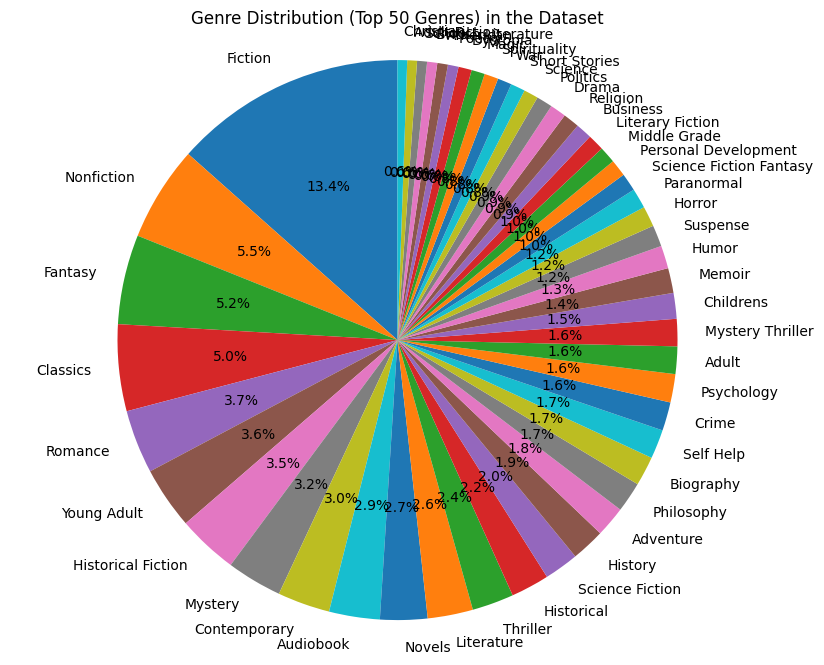

Fiction                    5698
Nonfiction                 2330
Fantasy                    2194
Classics                   2120
Romance                    1558
Young Adult                1522
Historical Fiction         1481
Mystery                    1357
Contemporary               1284
Audiobook                  1242
Novels                     1157
Literature                 1110
Thriller                   1021
Historical                  940
Science Fiction             844
History                     819
Adventure                   749
Philosophy                  742
Biography                   720
Self Help                   713
Crime                       699
Psychology                  694
Adult                       672
Mystery Thriller            667
Childrens                   630
Memoir                      610
Humor                       559
Suspense                    524
Horror                      501
Paranormal                  489
Science Fiction Fantasy     435
Personal

In [58]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'books_remain' has a 'Filtered_Genres' column that contains the filtered genres for each book
# Flatten the list of genres to count their frequency
all_genres = [genre for sublist in books_remain['Filtered_Genres'] for genre in sublist]

# Count occurrences of each genre
genre_counts = pd.Series(all_genres).value_counts()

# Plotting the pie chart for genre distribution
plt.figure(figsize=(10, 8))
plt.pie(genre_counts, labels=genre_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Genre Distribution (Top 50 Genres) in the Dataset')
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is circular.
plt.show()

# Print genre counts to verify distribution
print(genre_counts)


In [59]:
classifier = pipeline("zero-shot-classification", model="facebook/bart-large-mnli")
fiction_categories = ["Fiction","Nonfiction"]

Device set to use cuda:0


In [60]:
# def classify_genre_with_zero_shot(description):
#     # Use the classifier to predict the genre
#     result = classifier(description, fiction_categories)
    
#     # Return the label with the highest score
#     return result['labels'][0]

In [61]:
def classify_genre(description, fiction_categories):
    result = classifier(description, fiction_categories)
    return [(label, score) for label, score in zip(result["labels"], result["scores"]) if score > 0.3]

def predict_classifier(books_remain):
    predicted_genres = books_remain.iloc[:800]["Description"].progress_apply(
        lambda description: max(classify_genre(description, fiction_categories), key=lambda x: x[1])[0]
    )
    return predicted_genres


In [82]:
first_800 = books_remain[:800]
type(first_800)
first_800

,BookID,FormattedBookID,Book,Author,Description,Genres,Avg_Rating,Num_Ratings,URL,Processed_Genres,Filtered_Genres,Mapped_Genre
0,1,BK000001,Harry Potter and the Philosopher’s Stone (Harr...,J.K. Rowling,Harry Potter thinks he is an ordinary boy - un...,"['Fantasy', 'Fiction', 'Young Adult', 'Magic',...",4.47,9278135,https://www.goodreads.com/book/show/72193.Harr...,"[Fantasy, Fiction, Young Adult, Magic, Childre...","[Fantasy, Fiction, Young Adult, Magic, Childre...",Fiction
1,2,BK000002,"Hungerspelen (The Hunger Games, #1)",Suzanne Collins,24 deltagare. Bara en överlever. Varje år dire...,"['Young Adult', 'Fiction', 'Dystopia', 'Fantas...",4.33,7963186,https://www.goodreads.com/book/show/13616052-h...,"[Young Adult, Fiction, Dystopia, Fantasy, Scie...","[Young Adult, Fiction, Dystopia, Fantasy, Scie...",Fiction
2,3,BK000003,"The Hunger Games (The Hunger Games, #1)",Suzanne Collins,"Could you survive on your own in the wild, wit...","['Young Adult', 'Fiction', 'Dystopia', 'Fantas...",4.33,7963186,https://www.goodreads.com/book/show/12187803-t...,"[Young Adult, Fiction, Dystopia, Fantasy, Scie...","[Young Adult, Fiction, Dystopia, Fantasy, Scie...",Fiction
3,4,BK000004,"The Hunger Games (The Hunger Games, #1)",Suzanne Collins,In the ruins of a place once known as North Am...,"['Young Adult', 'Fiction', 'Dystopia', 'Fantas...",4.33,7963186,https://www.goodreads.com/book/show/18626858-t...,"[Young Adult, Fiction, Dystopia, Fantasy, Scie...","[Young Adult, Fiction, Dystopia, Fantasy, Scie...",Fiction
4,5,BK000005,"The Hunger Games (The Hunger Games, #1)",Suzanne Collins,Sometime in the future after the destruction o...,"['Young Adult', 'Fiction', 'Dystopia', 'Fantas...",4.33,7963186,https://www.goodreads.com/book/show/12091570-t...,"[Young Adult, Fiction, Dystopia, Fantasy, Scie...","[Young Adult, Fiction, Dystopia, Fantasy, Scie...",Fiction
...,...,...,...,...,...,...,...,...,...,...,...,...
795,796,BK000796,The Plague,Albert Camus,"The Plague is a novel by Albert Camus, publish...","['Fiction', 'Classics', 'Philosophy', 'France'...",4.02,238718,https://www.goodreads.com/book/show/11989.The_...,"[Fiction, Classics, Philosophy, France, Litera...","[Fiction, Classics, Philosophy, Literature, No...",Fiction
796,797,BK000797,"Drums of Autumn (Outlander, #4)",Diana Gabaldon,"In this breathtaking novel, rich in history an...","['Historical Fiction', 'Romance', 'Fantasy', '...",4.35,238473,https://www.goodreads.com/book/show/40909452-d...,"[Historical Fiction, Romance, Fantasy, Fiction...","[Historical Fiction, Romance, Fantasy, Fiction...",Fiction
797,798,BK000798,"The Murder of Roger Ackroyd (Hercule Poirot, #4)",Agatha Christie,Considered to be one of Agatha Christie's grea...,"['Mystery', 'Fiction', 'Classics', 'Crime', 'M...",4.26,238384,https://www.goodreads.com/book/show/16328.The_...,"[Mystery, Fiction, Classics, Crime, Mystery Th...","[Mystery, Fiction, Classics, Crime, Mystery Th...",Fiction
798,799,BK000799,The Tale of Peter Rabbit,Beatrix Potter,"""Now, my dears,"" said old Mrs Rabbit one morni...","['Childrens', 'Classics', 'Picture Books', 'Fi...",4.21,238241,https://www.goodreads.com/book/show/19321.The_...,"[Childrens, Classics, Picture Books, Fiction, ...","[Childrens, Classics, Fiction, Fantasy, Short ...",Fiction


In [63]:
from tqdm import tqdm
tqdm.pandas()  # Enable tqdm for pandas


predicted_genres = predict_classifier(first_800)



100%|██████████| 800/800 [03:51<00:00,  3.46it/s]
C:\Users\ANAND REDDY\AppData\Local\Temp\ipykernel_5648\3411884370.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  first_800["Predictes_Genres"] = predicted_genres


In [83]:
first_800["Predictes_Genres"] = predicted_genres

C:\Users\ANAND REDDY\AppData\Local\Temp\ipykernel_5648\2997197977.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  first_800["Predictes_Genres"] = predicted_genres


In [84]:
first_800

,BookID,FormattedBookID,Book,Author,Description,Genres,Avg_Rating,Num_Ratings,URL,Processed_Genres,Filtered_Genres,Mapped_Genre,Predictes_Genres
0,1,BK000001,Harry Potter and the Philosopher’s Stone (Harr...,J.K. Rowling,Harry Potter thinks he is an ordinary boy - un...,"['Fantasy', 'Fiction', 'Young Adult', 'Magic',...",4.47,9278135,https://www.goodreads.com/book/show/72193.Harr...,"[Fantasy, Fiction, Young Adult, Magic, Childre...","[Fantasy, Fiction, Young Adult, Magic, Childre...",Fiction,Fiction
1,2,BK000002,"Hungerspelen (The Hunger Games, #1)",Suzanne Collins,24 deltagare. Bara en överlever. Varje år dire...,"['Young Adult', 'Fiction', 'Dystopia', 'Fantas...",4.33,7963186,https://www.goodreads.com/book/show/13616052-h...,"[Young Adult, Fiction, Dystopia, Fantasy, Scie...","[Young Adult, Fiction, Dystopia, Fantasy, Scie...",Fiction,Fiction
2,3,BK000003,"The Hunger Games (The Hunger Games, #1)",Suzanne Collins,"Could you survive on your own in the wild, wit...","['Young Adult', 'Fiction', 'Dystopia', 'Fantas...",4.33,7963186,https://www.goodreads.com/book/show/12187803-t...,"[Young Adult, Fiction, Dystopia, Fantasy, Scie...","[Young Adult, Fiction, Dystopia, Fantasy, Scie...",Fiction,Fiction
3,4,BK000004,"The Hunger Games (The Hunger Games, #1)",Suzanne Collins,In the ruins of a place once known as North Am...,"['Young Adult', 'Fiction', 'Dystopia', 'Fantas...",4.33,7963186,https://www.goodreads.com/book/show/18626858-t...,"[Young Adult, Fiction, Dystopia, Fantasy, Scie...","[Young Adult, Fiction, Dystopia, Fantasy, Scie...",Fiction,Nonfiction
4,5,BK000005,"The Hunger Games (The Hunger Games, #1)",Suzanne Collins,Sometime in the future after the destruction o...,"['Young Adult', 'Fiction', 'Dystopia', 'Fantas...",4.33,7963186,https://www.goodreads.com/book/show/12091570-t...,"[Young Adult, Fiction, Dystopia, Fantasy, Scie...","[Young Adult, Fiction, Dystopia, Fantasy, Scie...",Fiction,Fiction
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,796,BK000796,The Plague,Albert Camus,"The Plague is a novel by Albert Camus, publish...","['Fiction', 'Classics', 'Philosophy', 'France'...",4.02,238718,https://www.goodreads.com/book/show/11989.The_...,"[Fiction, Classics, Philosophy, France, Litera...","[Fiction, Classics, Philosophy, Literature, No...",Fiction,Fiction
796,797,BK000797,"Drums of Autumn (Outlander, #4)",Diana Gabaldon,"In this breathtaking novel, rich in history an...","['Historical Fiction', 'Romance', 'Fantasy', '...",4.35,238473,https://www.goodreads.com/book/show/40909452-d...,"[Historical Fiction, Romance, Fantasy, Fiction...","[Historical Fiction, Romance, Fantasy, Fiction...",Fiction,Fiction
797,798,BK000798,"The Murder of Roger Ackroyd (Hercule Poirot, #4)",Agatha Christie,Considered to be one of Agatha Christie's grea...,"['Mystery', 'Fiction', 'Classics', 'Crime', 'M...",4.26,238384,https://www.goodreads.com/book/show/16328.The_...,"[Mystery, Fiction, Classics, Crime, Mystery Th...","[Mystery, Fiction, Classics, Crime, Mystery Th...",Fiction,Fiction
798,799,BK000799,The Tale of Peter Rabbit,Beatrix Potter,"""Now, my dears,"" said old Mrs Rabbit one morni...","['Childrens', 'Classics', 'Picture Books', 'Fi...",4.21,238241,https://www.goodreads.com/book/show/19321.The_...,"[Childrens, Classics, Picture Books, Fiction, ...","[Childrens, Classics, Fiction, Fantasy, Short ...",Fiction,Nonfiction


In [85]:
first_800['classified_accuracy'] = (
    np.where(first_800["Mapped_Genre"] == first_800["Predictes_Genres"],1,0)
)


C:\Users\ANAND REDDY\AppData\Local\Temp\ipykernel_5648\1695491050.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  first_800['classified_accuracy'] = (


In [86]:
first_800

,BookID,FormattedBookID,Book,Author,Description,Genres,Avg_Rating,Num_Ratings,URL,Processed_Genres,Filtered_Genres,Mapped_Genre,Predictes_Genres,classified_accuracy
0,1,BK000001,Harry Potter and the Philosopher’s Stone (Harr...,J.K. Rowling,Harry Potter thinks he is an ordinary boy - un...,"['Fantasy', 'Fiction', 'Young Adult', 'Magic',...",4.47,9278135,https://www.goodreads.com/book/show/72193.Harr...,"[Fantasy, Fiction, Young Adult, Magic, Childre...","[Fantasy, Fiction, Young Adult, Magic, Childre...",Fiction,Fiction,1
1,2,BK000002,"Hungerspelen (The Hunger Games, #1)",Suzanne Collins,24 deltagare. Bara en överlever. Varje år dire...,"['Young Adult', 'Fiction', 'Dystopia', 'Fantas...",4.33,7963186,https://www.goodreads.com/book/show/13616052-h...,"[Young Adult, Fiction, Dystopia, Fantasy, Scie...","[Young Adult, Fiction, Dystopia, Fantasy, Scie...",Fiction,Fiction,1
2,3,BK000003,"The Hunger Games (The Hunger Games, #1)",Suzanne Collins,"Could you survive on your own in the wild, wit...","['Young Adult', 'Fiction', 'Dystopia', 'Fantas...",4.33,7963186,https://www.goodreads.com/book/show/12187803-t...,"[Young Adult, Fiction, Dystopia, Fantasy, Scie...","[Young Adult, Fiction, Dystopia, Fantasy, Scie...",Fiction,Fiction,1
3,4,BK000004,"The Hunger Games (The Hunger Games, #1)",Suzanne Collins,In the ruins of a place once known as North Am...,"['Young Adult', 'Fiction', 'Dystopia', 'Fantas...",4.33,7963186,https://www.goodreads.com/book/show/18626858-t...,"[Young Adult, Fiction, Dystopia, Fantasy, Scie...","[Young Adult, Fiction, Dystopia, Fantasy, Scie...",Fiction,Nonfiction,0
4,5,BK000005,"The Hunger Games (The Hunger Games, #1)",Suzanne Collins,Sometime in the future after the destruction o...,"['Young Adult', 'Fiction', 'Dystopia', 'Fantas...",4.33,7963186,https://www.goodreads.com/book/show/12091570-t...,"[Young Adult, Fiction, Dystopia, Fantasy, Scie...","[Young Adult, Fiction, Dystopia, Fantasy, Scie...",Fiction,Fiction,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,796,BK000796,The Plague,Albert Camus,"The Plague is a novel by Albert Camus, publish...","['Fiction', 'Classics', 'Philosophy', 'France'...",4.02,238718,https://www.goodreads.com/book/show/11989.The_...,"[Fiction, Classics, Philosophy, France, Litera...","[Fiction, Classics, Philosophy, Literature, No...",Fiction,Fiction,1
796,797,BK000797,"Drums of Autumn (Outlander, #4)",Diana Gabaldon,"In this breathtaking novel, rich in history an...","['Historical Fiction', 'Romance', 'Fantasy', '...",4.35,238473,https://www.goodreads.com/book/show/40909452-d...,"[Historical Fiction, Romance, Fantasy, Fiction...","[Historical Fiction, Romance, Fantasy, Fiction...",Fiction,Fiction,1
797,798,BK000798,"The Murder of Roger Ackroyd (Hercule Poirot, #4)",Agatha Christie,Considered to be one of Agatha Christie's grea...,"['Mystery', 'Fiction', 'Classics', 'Crime', 'M...",4.26,238384,https://www.goodreads.com/book/show/16328.The_...,"[Mystery, Fiction, Classics, Crime, Mystery Th...","[Mystery, Fiction, Classics, Crime, Mystery Th...",Fiction,Fiction,1
798,799,BK000799,The Tale of Peter Rabbit,Beatrix Potter,"""Now, my dears,"" said old Mrs Rabbit one morni...","['Childrens', 'Classics', 'Picture Books', 'Fi...",4.21,238241,https://www.goodreads.com/book/show/19321.The_...,"[Childrens, Classics, Picture Books, Fiction, ...","[Childrens, Classics, Fiction, Fantasy, Short ...",Fiction,Nonfiction,0


In [87]:
acc = first_800["classified_accuracy"].sum() / len(first_800)

In [88]:
print(acc)

0.68625


In [89]:
def classify_genre(description, fiction_categories):
    result = classifier(description, fiction_categories)
    return [(label, score) for label, score in zip(result["labels"], result["scores"]) if score > 0.3]

def predict_classifier(books_remain):
    predicted_genres = books_remain["Description"].progress_apply(
        lambda description: max(classify_genre(description, fiction_categories), key=lambda x: x[1])[0]
    )
    return predicted_genres


In [90]:
from tqdm import tqdm
tqdm.pandas()  

predicted_genres = predict_classifier(books_remain)



100%|██████████| 8845/8845 [24:52<00:00,  5.93it/s]  


In [91]:
books_remain["Predicted_Genres"] = predicted_genres

C:\Users\ANAND REDDY\AppData\Local\Temp\ipykernel_5648\726414000.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_remain["Predicted_Genres"] = predicted_genres


In [92]:
books_remain

,BookID,FormattedBookID,Book,Author,Description,Genres,Avg_Rating,Num_Ratings,URL,Processed_Genres,Filtered_Genres,Mapped_Genre,Predicted_Genres
0,1,BK000001,Harry Potter and the Philosopher’s Stone (Harr...,J.K. Rowling,Harry Potter thinks he is an ordinary boy - un...,"['Fantasy', 'Fiction', 'Young Adult', 'Magic',...",4.47,9278135,https://www.goodreads.com/book/show/72193.Harr...,"[Fantasy, Fiction, Young Adult, Magic, Childre...","[Fantasy, Fiction, Young Adult, Magic, Childre...",Fiction,Fiction
1,2,BK000002,"Hungerspelen (The Hunger Games, #1)",Suzanne Collins,24 deltagare. Bara en överlever. Varje år dire...,"['Young Adult', 'Fiction', 'Dystopia', 'Fantas...",4.33,7963186,https://www.goodreads.com/book/show/13616052-h...,"[Young Adult, Fiction, Dystopia, Fantasy, Scie...","[Young Adult, Fiction, Dystopia, Fantasy, Scie...",Fiction,Fiction
2,3,BK000003,"The Hunger Games (The Hunger Games, #1)",Suzanne Collins,"Could you survive on your own in the wild, wit...","['Young Adult', 'Fiction', 'Dystopia', 'Fantas...",4.33,7963186,https://www.goodreads.com/book/show/12187803-t...,"[Young Adult, Fiction, Dystopia, Fantasy, Scie...","[Young Adult, Fiction, Dystopia, Fantasy, Scie...",Fiction,Fiction
3,4,BK000004,"The Hunger Games (The Hunger Games, #1)",Suzanne Collins,In the ruins of a place once known as North Am...,"['Young Adult', 'Fiction', 'Dystopia', 'Fantas...",4.33,7963186,https://www.goodreads.com/book/show/18626858-t...,"[Young Adult, Fiction, Dystopia, Fantasy, Scie...","[Young Adult, Fiction, Dystopia, Fantasy, Scie...",Fiction,Nonfiction
4,5,BK000005,"The Hunger Games (The Hunger Games, #1)",Suzanne Collins,Sometime in the future after the destruction o...,"['Young Adult', 'Fiction', 'Dystopia', 'Fantas...",4.33,7963186,https://www.goodreads.com/book/show/12091570-t...,"[Young Adult, Fiction, Dystopia, Fantasy, Scie...","[Young Adult, Fiction, Dystopia, Fantasy, Scie...",Fiction,Fiction
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8840,9026,BK009026,"Mutantupproret 99,4% DNA",Martin J. Sallberg,En dystopisk framtidsskildring av en värld eft...,"['Science Fiction', 'Dystopia']",4.20,5,https://www.goodreads.com/book/show/29762076-m...,"[Science Fiction, Dystopia]","[Science Fiction, Dystopia]",Nonfiction,Fiction
8841,9027,BK009027,The Future of Man: Extinction or Glory?,Peter Hollings,"In only a few generations, our species will ei...",['Science'],4.40,5,https://www.goodreads.com/book/show/6586918-th...,[Science],[Science],Nonfiction,Nonfiction
8842,9030,BK009030,"The Stone Seekers (Dragon Hunters, #1)",L.L. Hansen,"In 1000 B.C., two 10-year-old boys, Zeth and C...","['Fantasy', 'Dragons']",4.00,4,https://www.goodreads.com/book/show/17259389-t...,"[Fantasy, Dragons]",[Fantasy],Nonfiction,Nonfiction
8843,9033,BK009033,The Travels of Marco Polo,Giulio Einaudi,"Marco Polo, a Medieval Venetian, traveled thro...","['Travel', 'History']",3.00,4,https://www.goodreads.com/book/show/15790154-t...,"[Travel, History]",[History],Nonfiction,Nonfiction


In [93]:
books_remain["Predictions"] = (
    np.where(books_remain["Mapped_Genre"] == books_remain["Predicted_Genres"],1,0)
)

C:\Users\ANAND REDDY\AppData\Local\Temp\ipykernel_5648\3711887967.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_remain["Predictions"] = (


In [95]:
books_remain.head()

,BookID,FormattedBookID,Book,Author,Description,Genres,Avg_Rating,Num_Ratings,URL,Processed_Genres,Filtered_Genres,Mapped_Genre,Predicted_Genres,Predictions
0,1,BK000001,Harry Potter and the Philosopher’s Stone (Harr...,J.K. Rowling,Harry Potter thinks he is an ordinary boy - un...,"['Fantasy', 'Fiction', 'Young Adult', 'Magic',...",4.47,9278135,https://www.goodreads.com/book/show/72193.Harr...,"[Fantasy, Fiction, Young Adult, Magic, Childre...","[Fantasy, Fiction, Young Adult, Magic, Childre...",Fiction,Fiction,1
1,2,BK000002,"Hungerspelen (The Hunger Games, #1)",Suzanne Collins,24 deltagare. Bara en överlever. Varje år dire...,"['Young Adult', 'Fiction', 'Dystopia', 'Fantas...",4.33,7963186,https://www.goodreads.com/book/show/13616052-h...,"[Young Adult, Fiction, Dystopia, Fantasy, Scie...","[Young Adult, Fiction, Dystopia, Fantasy, Scie...",Fiction,Fiction,1
2,3,BK000003,"The Hunger Games (The Hunger Games, #1)",Suzanne Collins,"Could you survive on your own in the wild, wit...","['Young Adult', 'Fiction', 'Dystopia', 'Fantas...",4.33,7963186,https://www.goodreads.com/book/show/12187803-t...,"[Young Adult, Fiction, Dystopia, Fantasy, Scie...","[Young Adult, Fiction, Dystopia, Fantasy, Scie...",Fiction,Fiction,1
3,4,BK000004,"The Hunger Games (The Hunger Games, #1)",Suzanne Collins,In the ruins of a place once known as North Am...,"['Young Adult', 'Fiction', 'Dystopia', 'Fantas...",4.33,7963186,https://www.goodreads.com/book/show/18626858-t...,"[Young Adult, Fiction, Dystopia, Fantasy, Scie...","[Young Adult, Fiction, Dystopia, Fantasy, Scie...",Fiction,Nonfiction,0
4,5,BK000005,"The Hunger Games (The Hunger Games, #1)",Suzanne Collins,Sometime in the future after the destruction o...,"['Young Adult', 'Fiction', 'Dystopia', 'Fantas...",4.33,7963186,https://www.goodreads.com/book/show/12091570-t...,"[Young Adult, Fiction, Dystopia, Fantasy, Scie...","[Young Adult, Fiction, Dystopia, Fantasy, Scie...",Fiction,Fiction,1


In [96]:
accuracy = books_remain["Predictions"].sum() / len(books_remain)
print(accuracy)

0.7092142453363482


In [8]:
df=books[["FormattedBookID","id_desc"]]

In [ ]:
books_remain = pd.merge(books_remain,df,on="FormattedBookID")

In [10]:
books_remain.head()

,BookID,FormattedBookID,Book,Author,Description,Genres,Avg_Rating,Num_Ratings,URL,Processed_Genres,Filtered_Genres,Mapped_Genre,Predicted_Genres,Predictions,id_desc
0,1,BK000001,Harry Potter and the Philosopher’s Stone (Harr...,J.K. Rowling,Harry Potter thinks he is an ordinary boy - un...,"['Fantasy', 'Fiction', 'Young Adult', 'Magic',...",4.47,9278135,https://www.goodreads.com/book/show/72193.Harr...,"['Fantasy', 'Fiction', 'Young Adult', 'Magic',...","['Fantasy', 'Fiction', 'Young Adult', 'Magic',...",Fiction,Fiction,1,BK000001 Harry Potter thinks he is an ordinary...
1,2,BK000002,"Hungerspelen (The Hunger Games, #1)",Suzanne Collins,24 deltagare. Bara en överlever. Varje år dire...,"['Young Adult', 'Fiction', 'Dystopia', 'Fantas...",4.33,7963186,https://www.goodreads.com/book/show/13616052-h...,"['Young Adult', 'Fiction', 'Dystopia', 'Fantas...","['Young Adult', 'Fiction', 'Dystopia', 'Fantas...",Fiction,Fiction,1,BK000002 24 deltagare. Bara en överlever. Varj...
2,3,BK000003,"The Hunger Games (The Hunger Games, #1)",Suzanne Collins,"Could you survive on your own in the wild, wit...","['Young Adult', 'Fiction', 'Dystopia', 'Fantas...",4.33,7963186,https://www.goodreads.com/book/show/12187803-t...,"['Young Adult', 'Fiction', 'Dystopia', 'Fantas...","['Young Adult', 'Fiction', 'Dystopia', 'Fantas...",Fiction,Fiction,1,BK000003 Could you survive on your own in the ...
3,4,BK000004,"The Hunger Games (The Hunger Games, #1)",Suzanne Collins,In the ruins of a place once known as North Am...,"['Young Adult', 'Fiction', 'Dystopia', 'Fantas...",4.33,7963186,https://www.goodreads.com/book/show/18626858-t...,"['Young Adult', 'Fiction', 'Dystopia', 'Fantas...","['Young Adult', 'Fiction', 'Dystopia', 'Fantas...",Fiction,Nonfiction,0,BK000004 In the ruins of a place once known as...
4,5,BK000005,"The Hunger Games (The Hunger Games, #1)",Suzanne Collins,Sometime in the future after the destruction o...,"['Young Adult', 'Fiction', 'Dystopia', 'Fantas...",4.33,7963186,https://www.goodreads.com/book/show/12091570-t...,"['Young Adult', 'Fiction', 'Dystopia', 'Fantas...","['Young Adult', 'Fiction', 'Dystopia', 'Fantas...",Fiction,Fiction,1,BK000005 Sometime in the future after the dest...


In [12]:
books_remain.to_csv("books_text_classified.csv",index=False)